In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_excel("Dataset_diabetes.xlsx")

In [3]:
df.head()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,"Class (1: positive for diabetes, 0: negative for diabetes)"
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0,1


In [4]:
df.rename(columns ={"Class (1: positive for diabetes, 0: negative for diabetes)":"Result"},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number of times Pregnant     766 non-null    float64
 1   Plasma Concentration         767 non-null    float64
 2   Diastolic BP                 764 non-null    float64
 3   Triceps Skin fold thickness  767 non-null    float64
 4   insulin                      764 non-null    float64
 5   BMI                          765 non-null    float64
 6   Age                          766 non-null    float64
 7   Result                       768 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 48.1 KB


In [6]:
df.isnull().sum()

Number of times Pregnant       2
Plasma Concentration           1
Diastolic BP                   4
Triceps Skin fold thickness    1
insulin                        4
BMI                            3
Age                            2
Result                         0
dtype: int64

**There are missing values in each column. Need to figure out ways to handle them first**

<AxesSubplot:xlabel='Age', ylabel='Number of times Pregnant'>

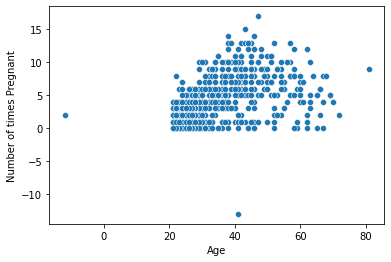

In [8]:
sns.scatterplot(x="Age",y="Number of times Pregnant",data=df)

<AxesSubplot:xlabel='Age', ylabel='BMI'>

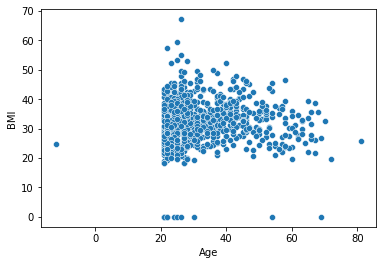

In [9]:
sns.scatterplot(x="Age",y="BMI",data=df)

**Could notice some incorrect information, such as negative figures for the age and the number of pregnancies. So replacing them to nan Values which can be imputed later**

In [10]:
df.loc[df['Number of times Pregnant'] < 0,"Number of times Pregnant"] = np.nan
df.loc[df['Age'] < 0,'Age'] = np.nan

In [11]:
df.isnull().sum()

Number of times Pregnant       3
Plasma Concentration           1
Diastolic BP                   4
Triceps Skin fold thickness    1
insulin                        4
BMI                            3
Age                            3
Result                         0
dtype: int64

In [12]:
df[df.isnull().sum(axis=1) >= 1]

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,Result
14,5.0,166.0,72.0,19.0,175.0,NaN,51.0,1
25,10.0,125.0,NaN,26.0,115.0,31.1,41.0,1
83,0.0,101.0,NaN,28.0,0.0,24.6,22.0,0
94,2.0,142.0,82.0,18.0,64.0,24.7,NaN,0
118,NaN,97.0,60.0,23.0,0.0,28.2,22.0,0
148,5.0,147.0,78.0,0.0,NaN,33.7,65.0,0
173,1.0,79.0,60.0,42.0,48.0,43.5,NaN,0
218,NaN,85.0,74.0,22.0,0.0,29.0,32.0,1
232,1.0,79.0,NaN,25.0,37.0,25.4,22.0,0
297,0.0,126.0,84.0,29.0,NaN,30.7,24.0,0


In [121]:
##Using KNN Imputer to get imputed values for Age and Number of times pregnant from other features

In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputed_data = imputer.fit_transform(df)  # impute all the missing data
df_temp = pd.DataFrame(imputed_data)
df_temp.columns = df.columns
df['Number of times Pregnant'] = df_temp['Number of times Pregnant'] # update only the desired column
df['Age'] = df_temp['Age']

In [14]:
result = df.iloc[["94", "333"]]

result

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,Result
94,2.0,142.0,82.0,18.0,64.0,24.7,45.0,0
333,12.0,106.0,80.0,0.0,NaN,NaN,40.2,0


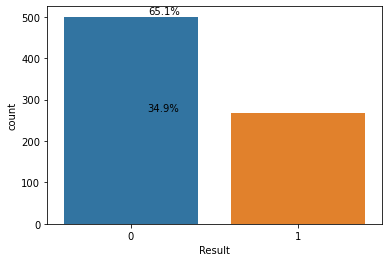

In [15]:
#Checking the class imbalance

total=len(df['Result'])*1.
ax=sns.countplot(x ='Result', data = df)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_y()+0.1, p.get_height()+5))

**About 65% of the patients are healthy**

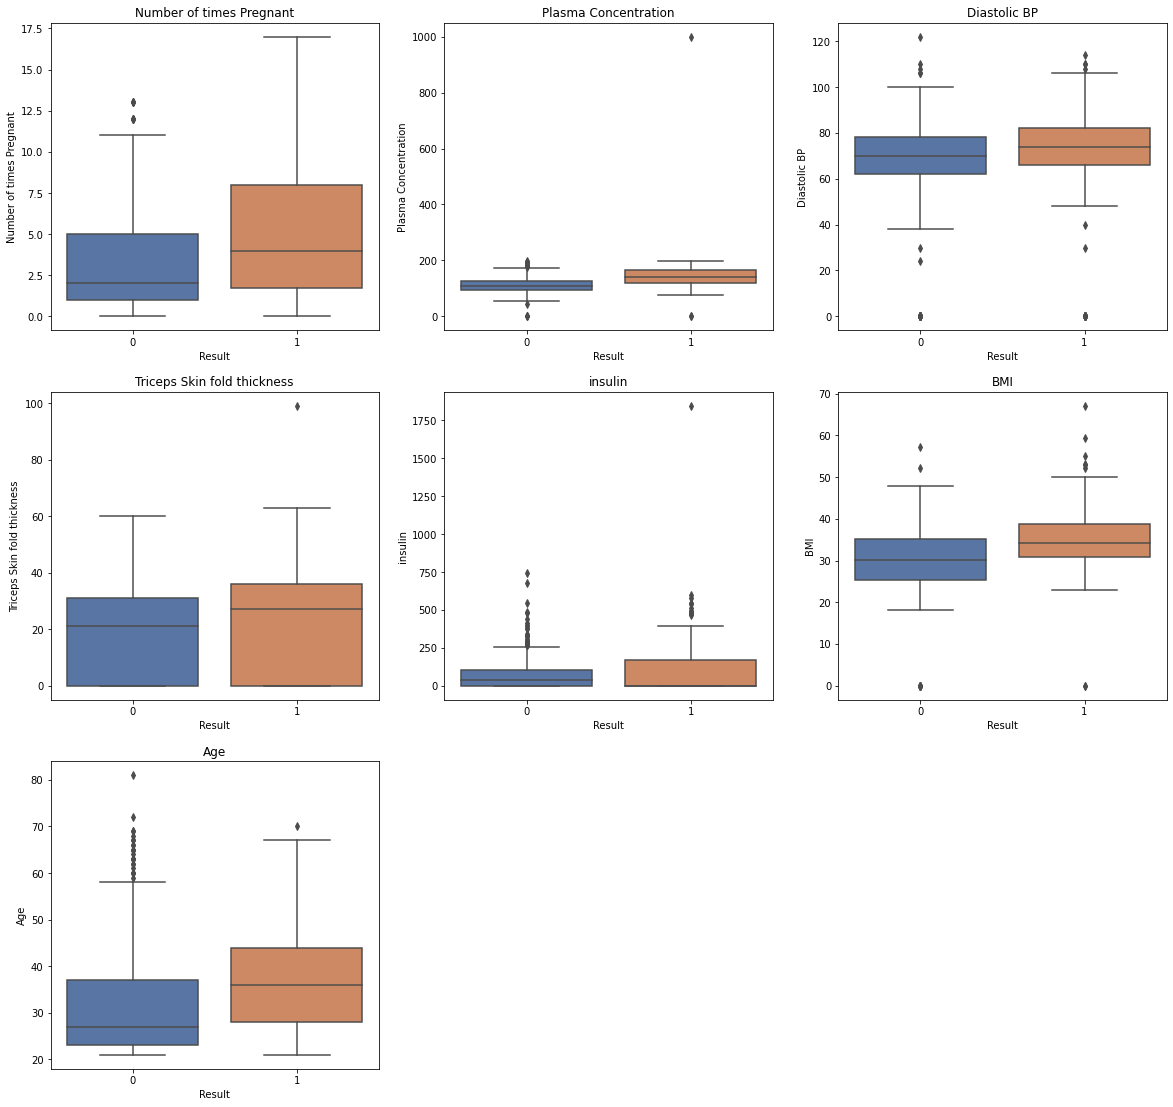

In [17]:
N_col = ['Number of times Pregnant', 'Plasma Concentration', 'Diastolic BP',
       'Triceps Skin fold thickness', 'insulin', 'BMI', 'Age']
plt.figure(figsize=(20,60), facecolor='white')
plotnum=1
for col in N_col:
    ax=plt.subplot(9,3,plotnum)
    sns.boxplot(y=df[col],x=df['Result'],palette="deep")
    plt.title(col)
    plotnum+=1
plt.show()

**Age, BMI could be detrimental in determining the Diabetes of the patient by visual inspection**

Text(0.5, 1.0, 'Correlation Plot')

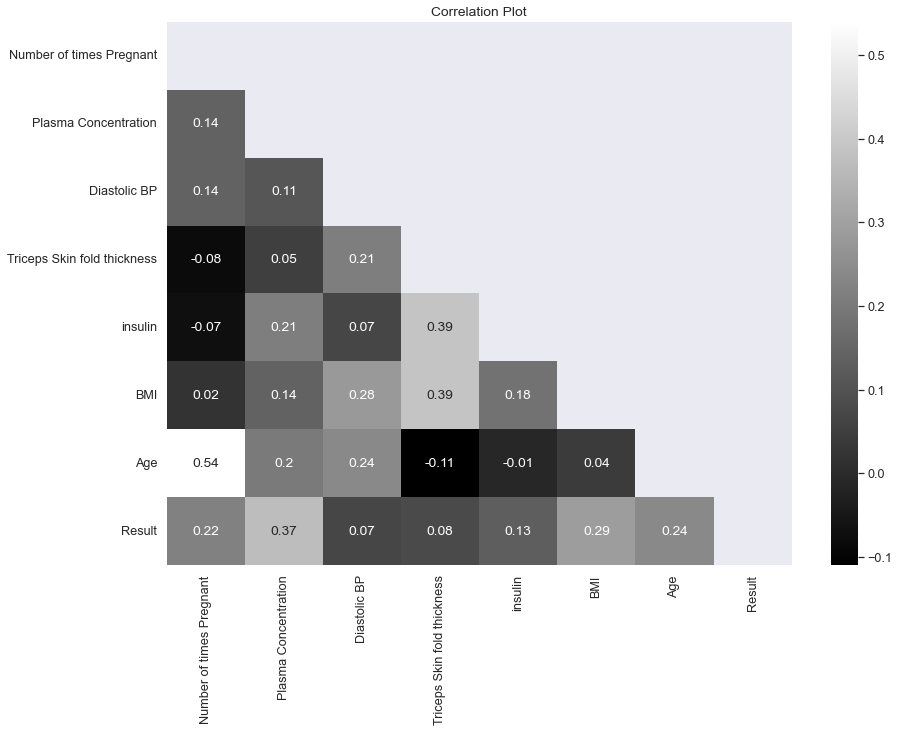

In [18]:
corr=df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_palette("bright")
sns.set_style("darkgrid")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='gist_yarg_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

In [ ]:
## correlation with target variable is showing strength for Age,BMI and Pregnancy

In [19]:
##For pregnancies zero value makes sense, but cannot conclude the same with other features. 
##So lets check proportion of zeros in each column

In [20]:
features = ['Plasma Concentration', 'Diastolic BP',
       'Triceps Skin fold thickness', 'insulin', 'BMI', 'Age']
total_count = len(df)

for feature in features:
    count = df[df[feature]==0][feature].count()
    print('{0} : percent of zero values {1:.2f} %'.format(feature, 100*count/total_count))

Plasma Concentration : percent of zero values 0.65 %
Diastolic BP : percent of zero values 4.56 %
Triceps Skin fold thickness : percent of zero values 29.56 %
insulin : percent of zero values 48.44 %
BMI : percent of zero values 1.43 %
Age : percent of zero values 0.00 %


**Creating some additional columns for better EDA**

In [96]:
df.loc[(df['Age'] >= 18) & (df['Age'] < 28) , 'Age_group'] ="young_women_"
df.loc[(df['Age'] >= 28) & (df['Age'] < 40) , 'Age_group'] ="mature_women"
df.loc[(df['Age'] >= 40) & (df['Age'] < 55) , 'Age_group'] ="middle_age"
df.loc[(df['Age'] >= 55) , 'Age_group'] ="elder_age"

In [85]:
df.loc[(df['BMI'] < 18.5), 'Bmi_status'] ="Underweight"
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] < 24.9) , 'Bmi_status'] ="Normal"
df.loc[(df['BMI'] >= 25) & (df['BMI'] < 29.9) , 'Bmi_status'] ="Overweight"
df.loc[(df['BMI'] >= 30), 'Bmi_status'] ="Obese"

In [87]:
df.loc[(df['Diastolic BP'] < 70)  , 'BP_Category'] ="low"
df.loc[(df['Diastolic BP'] >= 70) & (df['Diastolic BP'] < 90) , 'BP_Category'] ="normal"
df.loc[(df['Diastolic BP'] >= 90 ) , 'BP_Category'] ="high"

<AxesSubplot:xlabel='Age_group', ylabel='count'>

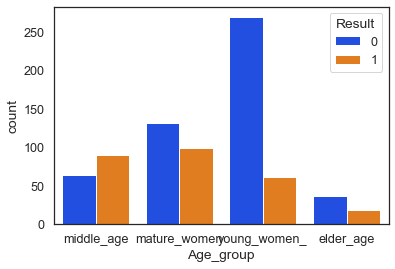

In [101]:
sns.countplot(data = df
            ,x = 'Age_group'
            ,hue = 'Result'
            )

**On a simple holistic view middle aged and mature women tend to have higher incidence of diabetes. Large number of young women tends to stay healthy**

**Lets Validate it by conducting a Chi square test**



In [107]:
contingency_table = pd.crosstab(df['Result'], df['Age_group'])
contingency_table

Age_group,elder_age,mature_women,middle_age,young_women_
Result,,,,
0,36,131,64,269
1,18,99,90,61


In [112]:
##From aggregated info its clearly visible that middle age women are higher at risk

In [110]:
from scipy.stats import chi2_contingency

chi2_statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(contingency_table)
print(chi2_statistic)
print(p_value)

83.47933270519226
5.502179858277732e-18


***The p-value is less than the significance level of 0.05, 
which indicates that we can reject the null hypothesis of independence and 
conclude that there is a significant association between Age_group and Diabetes.***

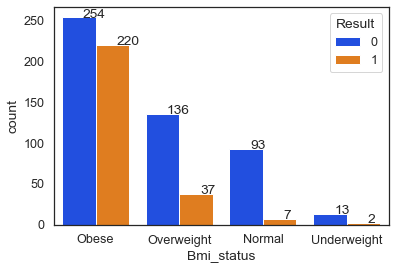

In [116]:
ax=sns.countplot(data = df
            ,x = 'Bmi_status'
            ,hue = 'Result'
            )

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

**Obese people have the highest number of diabetes incidents which relates to their unhealthy food habits**

<AxesSubplot:xlabel='BP_Category', ylabel='count'>

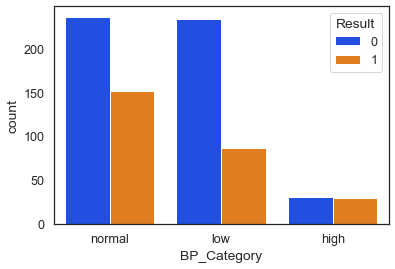

In [104]:
sns.countplot(data = df
            ,x = 'BP_Category'
            ,hue = 'Result'
            )

**Only with diastolic BP level it is difficult to reach a conclusion on whether a person has Diabetes or not**

Text(0.5, 1.0, 'Violin Plot of Age by Bmi_status, Separated by Non Diabetic/ Diabetic')

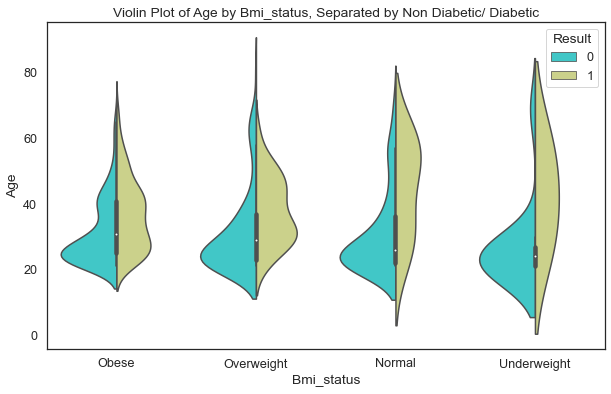

In [118]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Bmi_status',y="Age",data=df, hue='Result', split='True', palette='rainbow')
plt.title("Violin Plot of Age by Bmi_status, Separated by Non Diabetic/ Diabetic")

**The distribution of Diabetes patients are bimodal with two peaks at 30s and 45s**

In [119]:
contingency_table2 = pd.crosstab(df['Bmi_status'], df['Age_group'])
contingency_table2

Age_group,elder_age,mature_women,middle_age,young_women_
Bmi_status,,,,
Normal,12,22,9,57
Obese,24,152,119,179
Overweight,16,53,23,81
Underweight,1,1,1,12


**It is clearly evident that a large number of young and mature woman are at risk of potential diabetes in the future coz 
they are leading an unhealthy lifestyle**

In [98]:
df.loc[df['Triceps Skin fold thickness'] == 0,"Triceps Skin fold thickness"] = np.nan
df.loc[df['insulin']== 0,'insulin'] = np.nan

In [31]:
# Using miceforest imputation method to fill 0 values in insulin and skin fold thickness
import miceforest as mf

In [32]:
# Create kernel. 
kds = mf.ImputationKernel(
  df,
  save_all_iterations=True,
  random_state=100
)

# Run the MICE algorithm for 5 iterations
kds.mice(5)

# Return the completed dataset.
df_imputed = kds.complete_data()

In [33]:
df_imputed.head()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,Result
0,6.0,148.0,72.0,35.0,168.0,33.6,50.0,1
1,1.0,85.0,66.0,29.0,66.0,26.6,31.0,0
2,8.0,183.0,64.0,23.0,370.0,23.3,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0,1


In [35]:
df['Triceps Skin fold thickness'] = df_imputed['Triceps Skin fold thickness'] # update only the desired column
df['insulin'] = df_imputed['insulin']

In [44]:
df['Plasma Concentration'].fillna(int(df['Plasma Concentration'].mean()), inplace=True)
df['Diastolic BP'].fillna(int(df['Diastolic BP'].mean()), inplace=True)
df['BMI'].fillna(int(df['BMI'].mean()), inplace=True)

Text(0.5, 1.0, 'Correlation Plot')

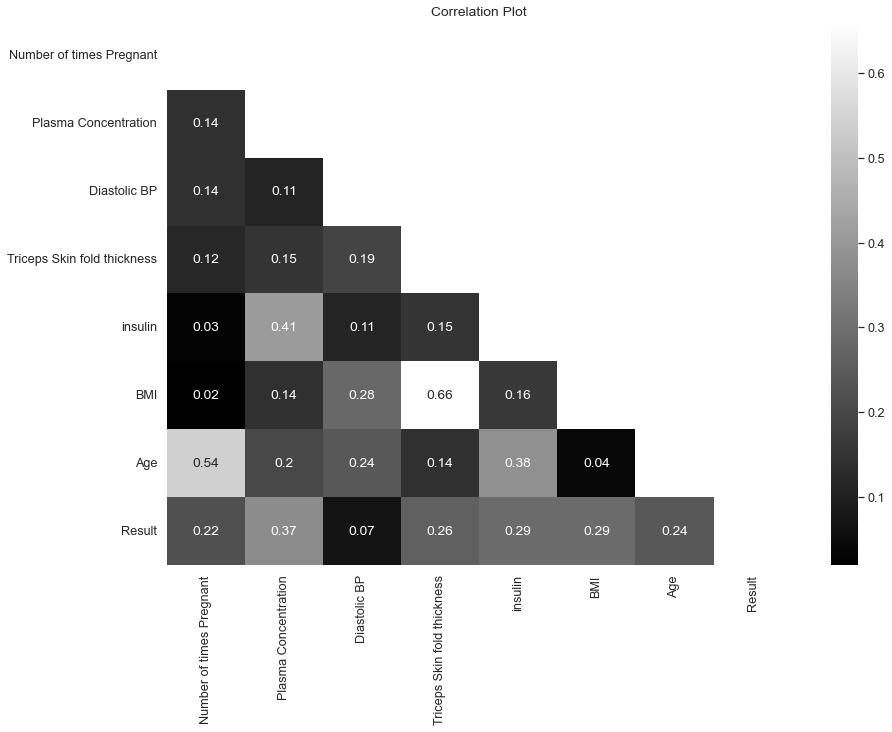

In [37]:
corr=df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='gist_yarg_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

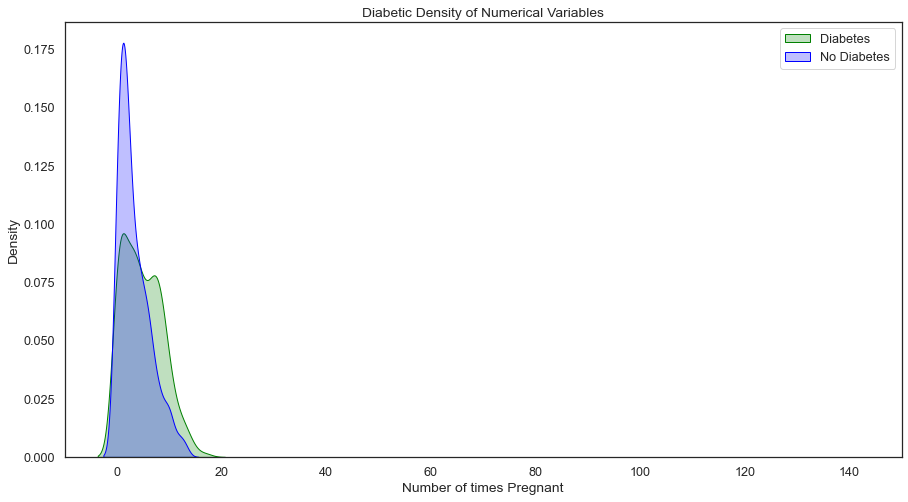

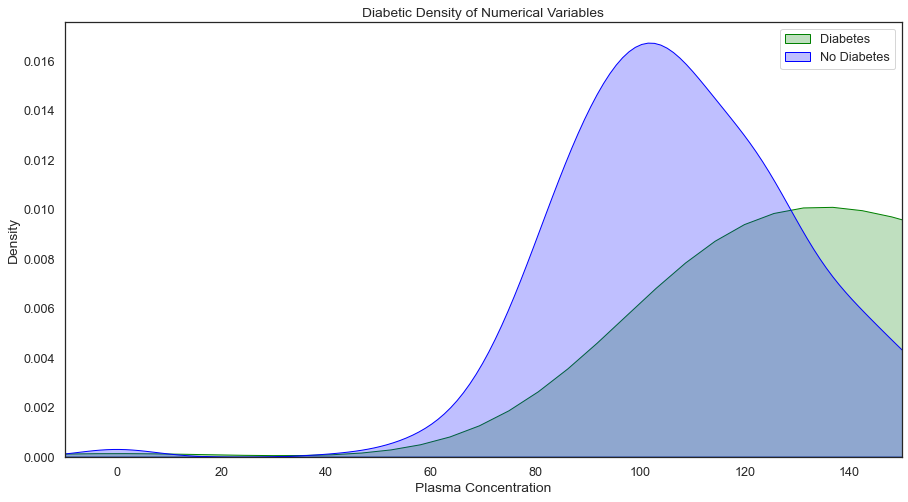

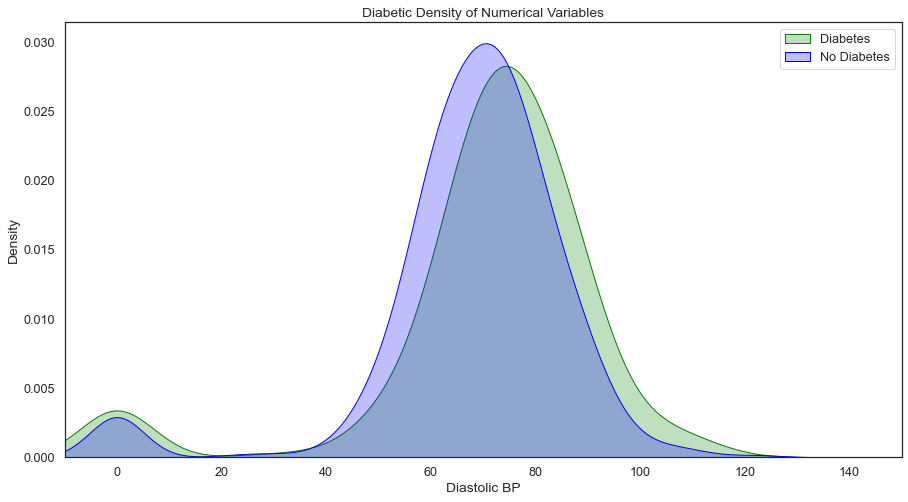

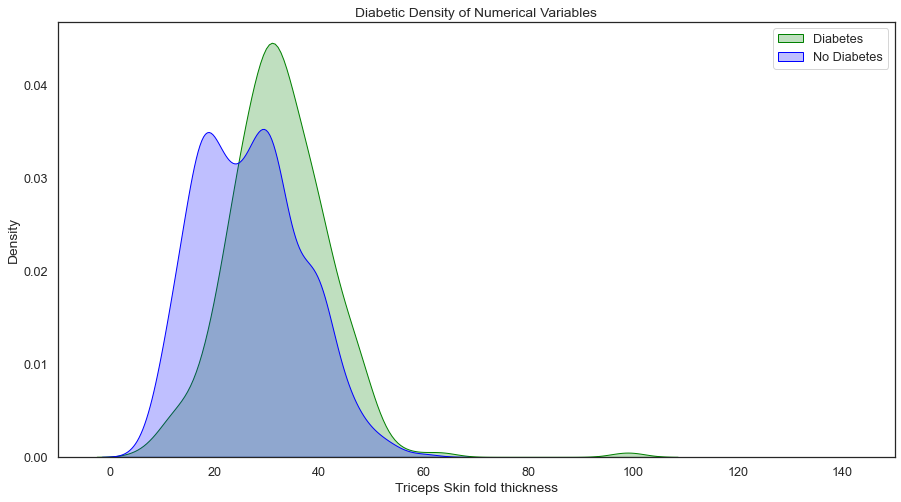

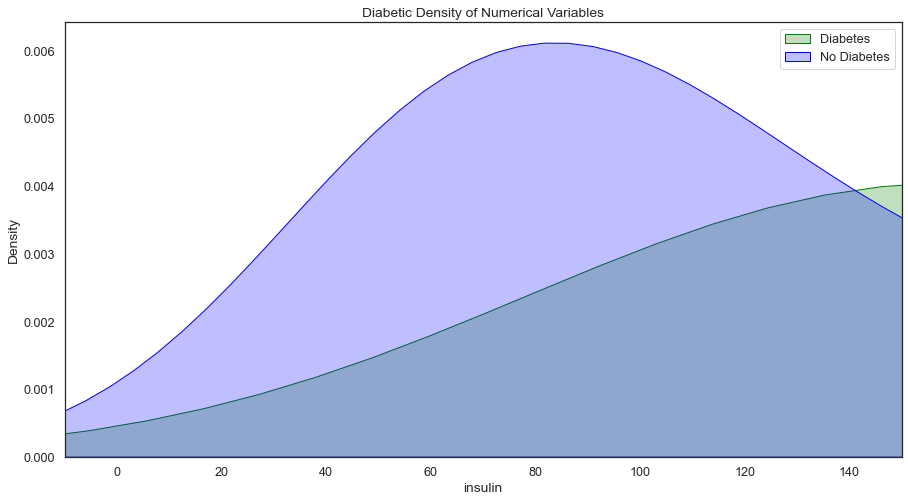

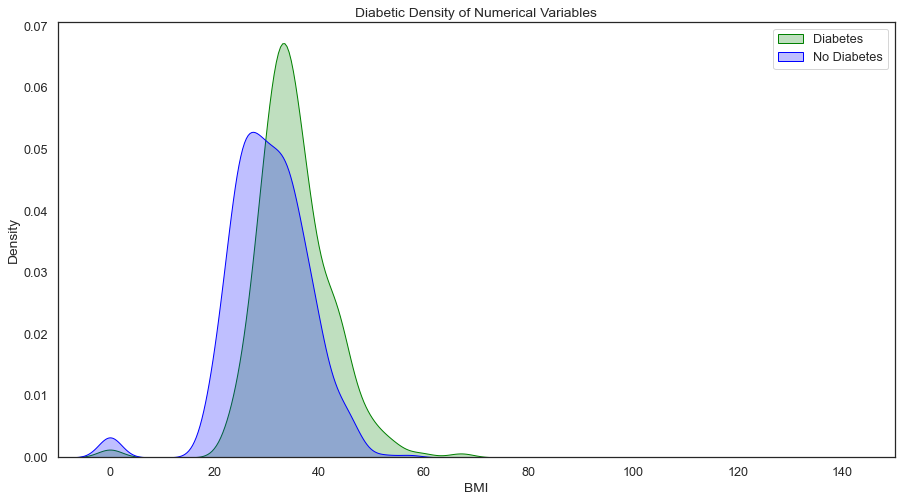

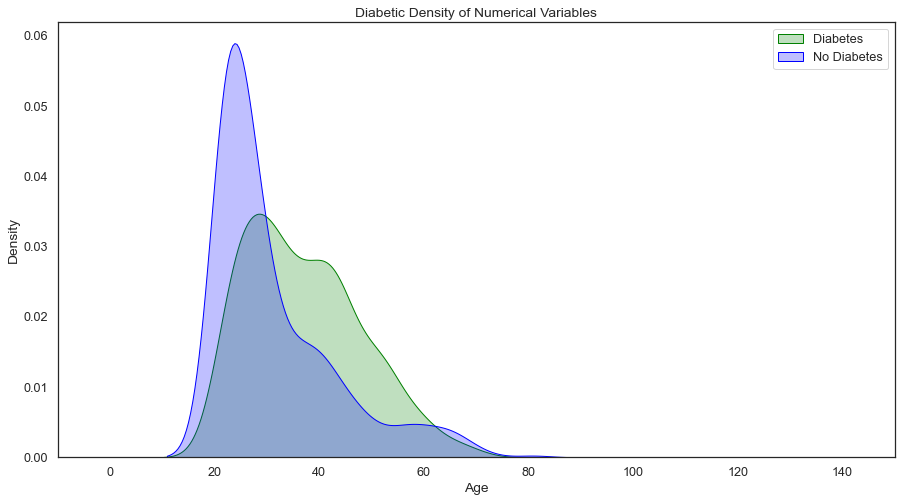

In [52]:
def target_density_est_with_num(df,target, numerical_col):
    plt.figure(figsize=(15,8))
    ax = sns.kdeplot(df[col][df.Result == 1], color="green", shade=True)
    sns.kdeplot(df[col][df.Result == 0], color="blue", shade=True)
    plt.legend(['Diabetes', 'No Diabetes'])
    plt.xlim(-10,150)
    plt.title("Diabetic Density of Numerical Variables")
    plt.show()

num_cols=['Number of times Pregnant', 'Plasma Concentration', 'Diastolic BP',
       'Triceps Skin fold thickness', 'insulin', 'BMI', 'Age']    
for col in num_cols:
    target_density_est_with_num(df,"Result",col)

**The classifier will find most use of Age, BMI and Triceps thickness as best predictors for the model as the distribution chart depicts**

In [38]:
df.columns

Index(['Number of times Pregnant', 'Plasma Concentration', 'Diastolic BP',
       'Triceps Skin fold thickness', 'insulin', 'BMI', 'Age', 'Result'],
      dtype='object')

In [55]:
X_ = pd.DataFrame(df , columns = ['Number of times Pregnant', 'Plasma Concentration', 'Diastolic BP',
       'Triceps Skin fold thickness', 'insulin', 'BMI', 'Age'])
y = df.Result

In [ ]:
##feature scaling

In [56]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X = scaler.fit_transform(X_)

In [57]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.25 , random_state = 0)

In [ ]:
## Model Building

In [58]:
logreg = LogisticRegression (solver = "liblinear")

logreg.fit (X_train , y_train)                      
y_pred = logreg.predict(X_test)                    
y_predicted_proba = logreg.predict_proba(X_test)  

In [59]:
print ("Accuracy: " , metrics.accuracy_score (y_test , y_pred))

Accuracy:  0.7708333333333334


In [62]:
print (classification_report (y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       130
           1       0.67      0.56      0.61        62

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.77      0.77       192



In [64]:
# GBM
gbm_model = GradientBoostingClassifier()
# Model Tuning
gbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "max_depth": [3,5, 8, 10],
               "n_estimators": [200, 500],
               "subsample": [1, 0.5, 0.8]}
gbm_cv_model = GridSearchCV(gbm_model,
                            gbm_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=2).fit(X_train, y_train)
gbm_cv_model.best_params_
# Final Model
gbm_tuned = GradientBoostingClassifier(**gbm_cv_model.best_params_).fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [71]:
y_pred_gbm = gbm_tuned.predict(X_test)

In [72]:
print (classification_report (y_test ,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       130
           1       0.73      0.52      0.60        62

    accuracy                           0.78       192
   macro avg       0.76      0.71      0.73       192
weighted avg       0.77      0.78      0.77       192



<Figure size 432x288 with 0 Axes>

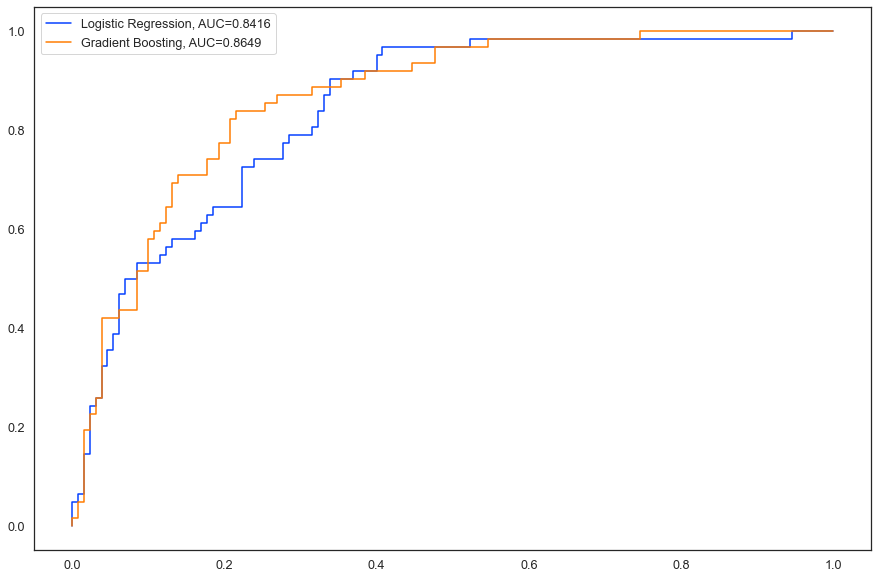

In [83]:
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(15,10))

#fit logistic regression model and plot ROC curve
y_pred = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
y_pred = gbm_tuned.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

In [ ]:
#Tuned GBM performed better than Logistic regression

In [ ]:
# BMI and age variables for women are particularly significant in the case of diabetes.
# Women in their middle age, between 40 and 65, may have a higher incidence of diabetes.
# Younger generation will be at risk in near term as they are Obese